- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/ 

- - - -

Neal Gordon  
2017-02-20  

- - - -


**1) Curve Fitting**    
**2) Root Finding**  
**3) Function Minimization**  

- - - -
### Curve Fitting

This is a spattering of scripts to curve fit various data and plots

In [30]:
# import modules
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## First order Linear Curve fit with polyfit

basic linear fit with numpy module polyfit

(0, 12)

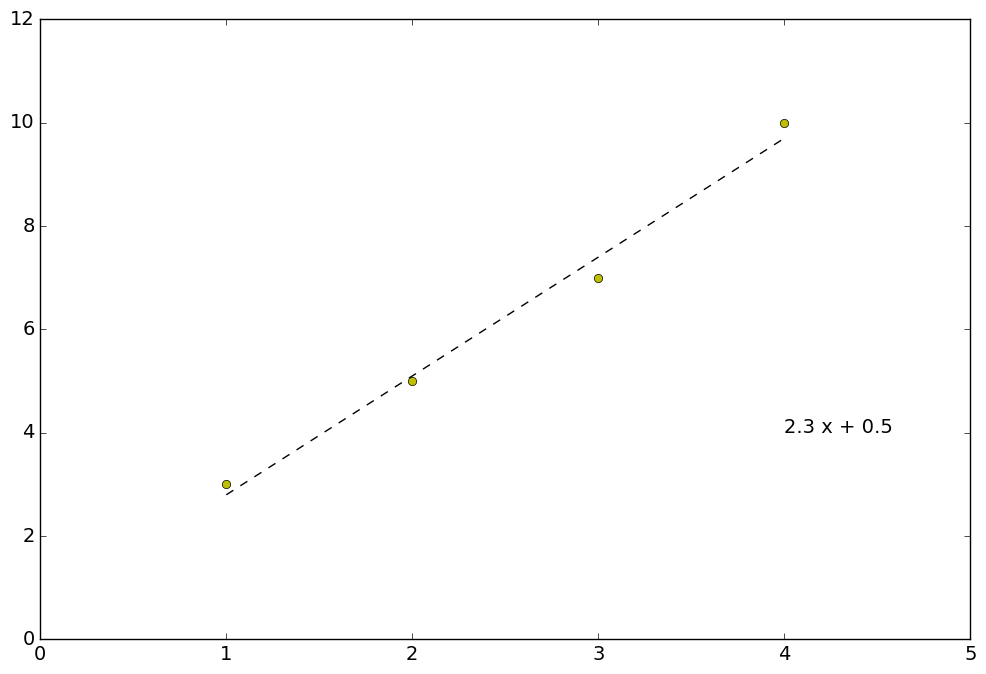

In [31]:
# Method 1 - polyfit
x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.text(4,4,fit_fn)
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

## Third order polynominal curve fit with poly1d

         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968
 ------------------------------------------ 
           5         4         3         2
-0.008333 x + 0.125 x - 0.575 x + 0.625 x + 0.6333 x - 1.886e-14


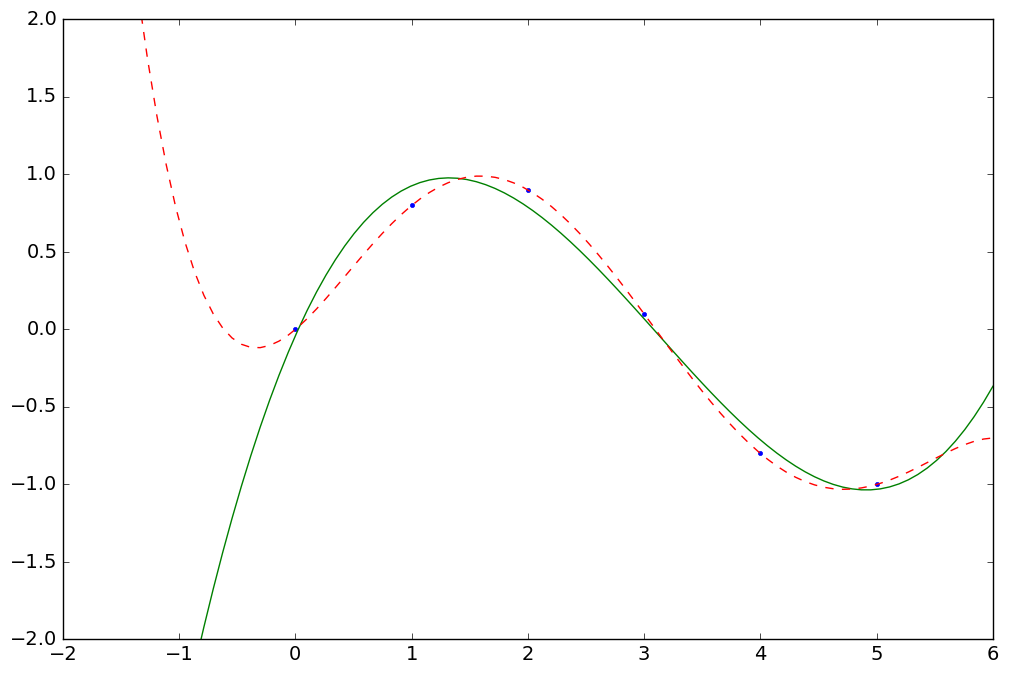

In [32]:
x = array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = polyfit(x, y, 3)

p = poly1d(z)
print(p)

p6 = poly1d(polyfit(x, y, 5))
print(' ------------------------------------------ ')
print(p6)

xp = linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p6(xp), '--')
plt.ylim(-2,2)

plt.show()

## Another Third order polyfit curve fit

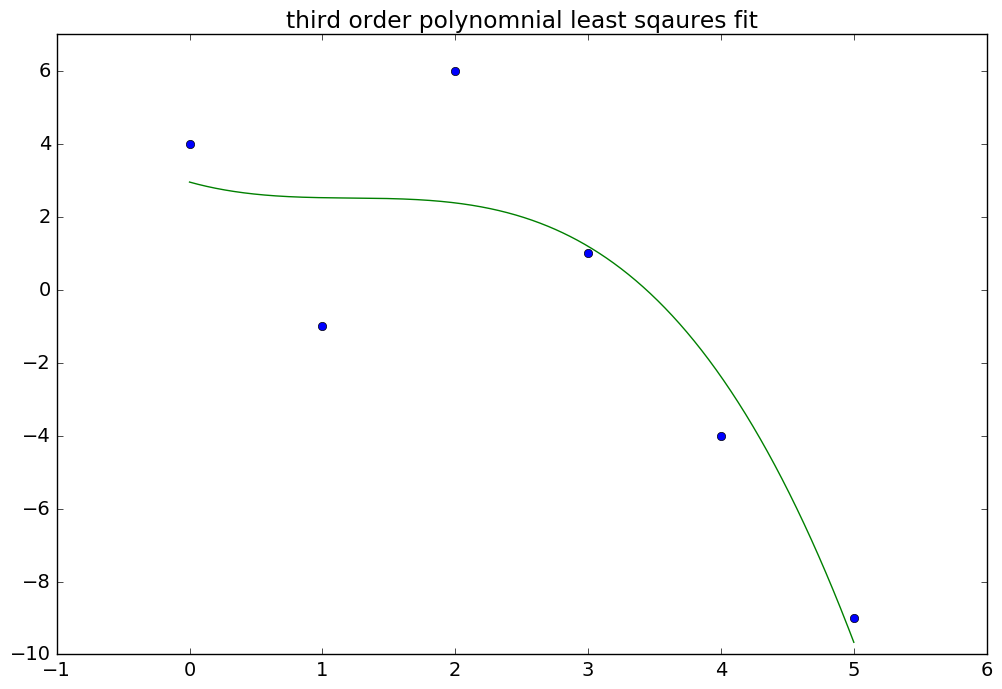

In [33]:
# 3rd order polynomial curve fit

X = array([0,  1, 2, 3,  4,  5])
Y = array([4, -1, 6, 1, -4, -9])
order=3 # integer > 0
C = polyfit(X,Y,order);
C = flipud(C)

h = 1000
xfit = linspace(min(X),max(X),h);
yfit = zeros(len(xfit))

for i,c in enumerate(C):
    yfit += c*xfit**i

plt.plot(X,Y,'o',xfit,yfit)
plt.title('third order polynomnial least sqaures fit')
plt.xlim([-1,6])
plt.ylim([-10,7])
plt.show()

## non-linear least squares using fmin optimization

(0, 2)

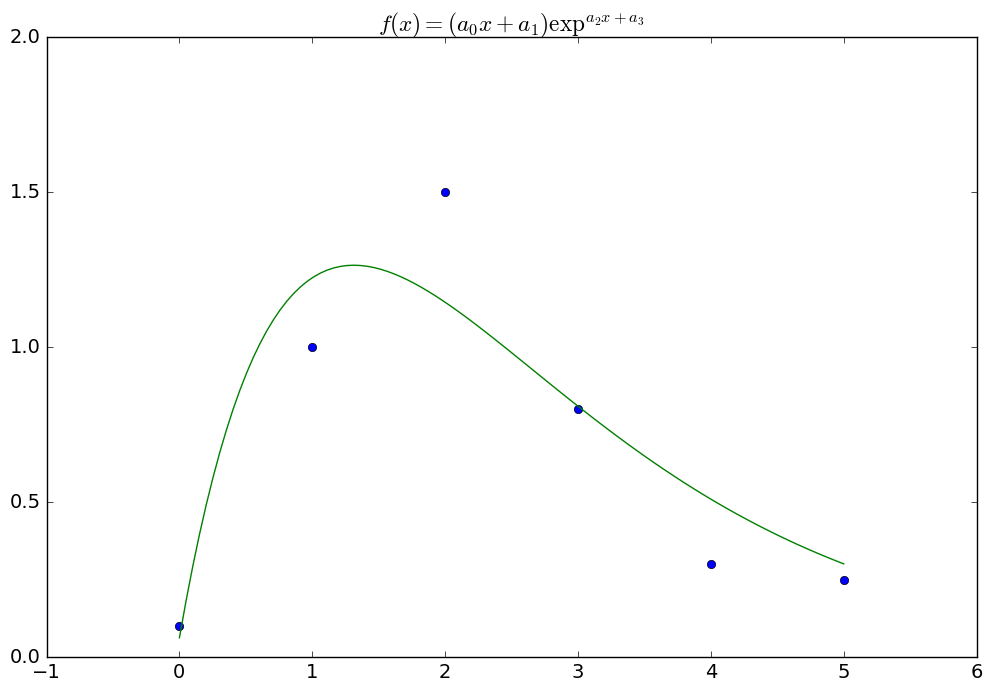

In [34]:
# non-linear least squares
x = arange(-pi,pi, 0.01)
y = sin(x)*exp(-x)

X = array([0 ,   1 , 2 ,   3 ,   4 ,   5 ])
Y = array([0.1,  1 , 1.5 , 0.8 , 0.3 , 0.25 ])

fn = lambda a: (a[0]*X+a[1]) * exp(a[2]*X+a[3])
Sn = lambda x: sum( (fn(x)-Y)**2 )
A = fmin(func=Sn, x0=[0,0,0,0])

plt.plot(X, Y,'o')
xplot = linspace(0,5,100)
fnfit = lambda x,a: (a[0]*x+a[1]) * exp(a[2]*x+a[3])
plt.plot(xplot, fnfit(xplot, A))
plt.title(r'$f(x)=(a_0x+a_1)\exp^{a_2x+a_3}$')
plt.xlim([-1,6])
plt.ylim([0,2])

## Another example with fmin optimization for curve fitting

Optimization terminated successfully.
         Current function value: 0.015158
         Iterations: 109
         Function evaluations: 208
[ 0.49404038  3.96935945]


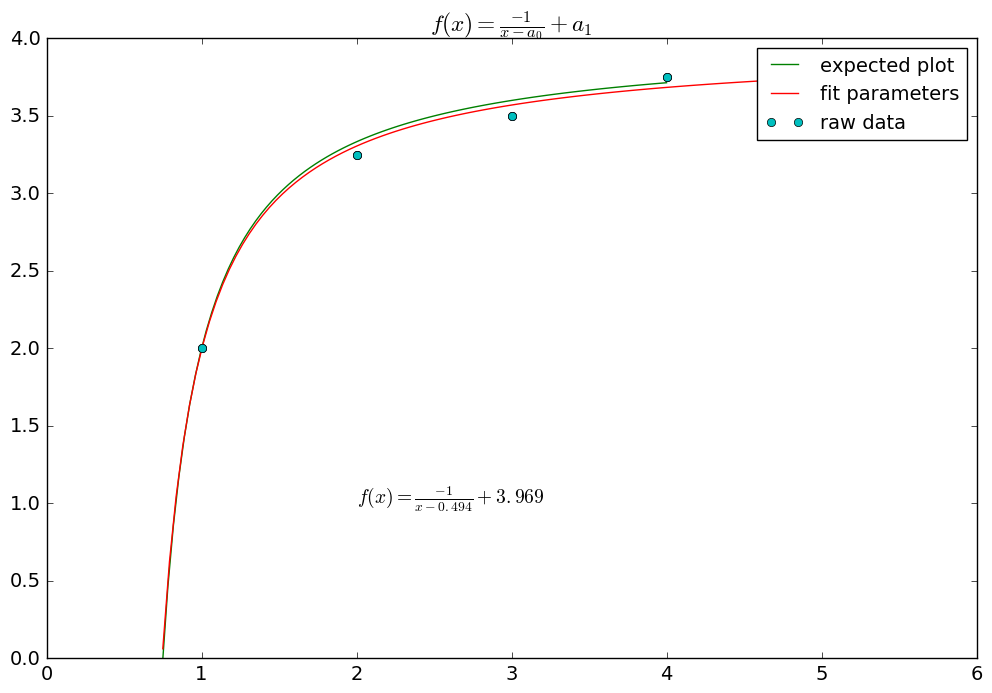

In [35]:
# fmin optization

X = array([1, 2,    3,   4 ,    5 ])
Y = array([2, 3.25, 3.5, 3.75 , 3.8])

# a[0] is the x asymptote and a[1] is the y asymptote and 
fn = lambda a: -1/(X-a[0]) + a[1]
Sn = lambda x: sum( (fn(x)-Y)**2 )

A = fmin(func=Sn, x0=[0,0])
print(A)
plt.plot(X, Y,'o')
xplot = linspace(0.75 , 5,100)
fnfit = lambda x,a: -1/(x-a[0]) + a[1]

eps = 1e-16
xp = 0.5
yp = 4
x = linspace(xp,4,100)
y = -1/(x-xp+eps)+yp
plt.plot(x,y,label='expected plot')
plt.ylim([0,yp])
plt.title('plot of how the function should look with actual parameters')

plt.plot(xplot, fnfit(xplot, A),label='fit parameters')
plt.plot(X,Y, 'o',label='raw data')
plt.title(r'$f(x)=\frac{-1}{x-a_0}+a_1$')
plt.text(2,1,r'$f(x)=\frac{-1}{x-0.494}+3.969$')
plt.xlim([0,6])
plt.legend()

## Root Finding and minimization

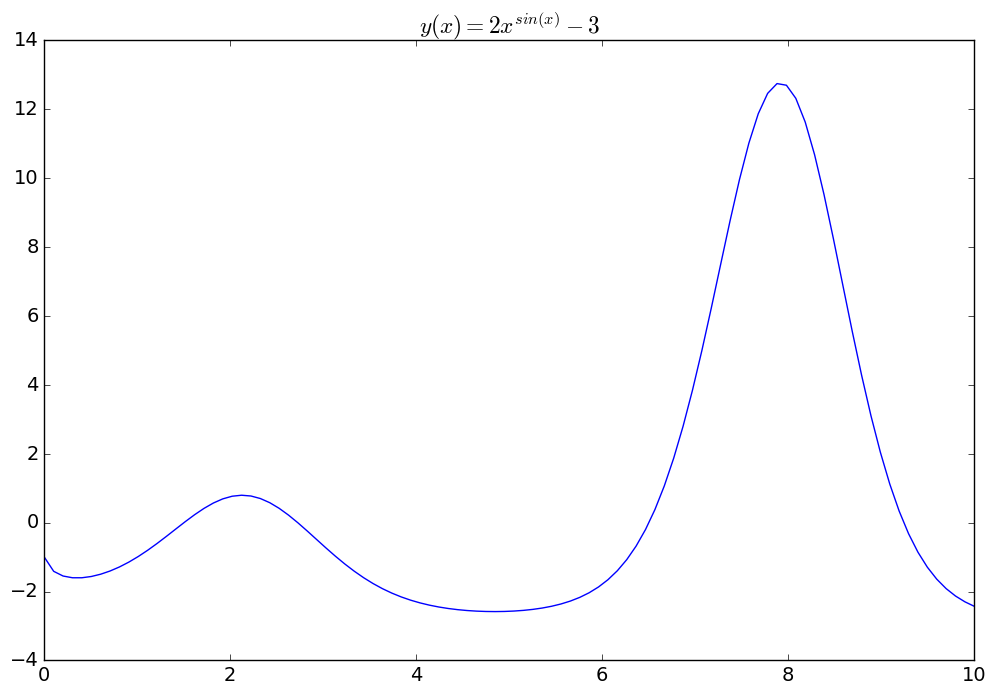

In [51]:
x = linspace(0,10,100)
y = lambda x: 2*x**(sin(x))-3
plot(x,y(x)) 
plt.title(r'$y(x)=2x^{sin(x)}-3$');

## Function Minimum Finding with scipy module

In [45]:
# minimization
print('roots with minimize function')
xguess = 3
ymin = scipy.optimize.minimize(y,xguess)
if ymin.success:
    print(ymin.message)
    print('minimum found at x={:.2f},y={:.2f}'.format(ymin.x[0],ymin.fun))

else:
    print('failed to find min')

roots with minimize function
Optimization terminated successfully.
minimum found at x=4.84,y=-2.58


In [52]:
# http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
from scipy.optimize import minimize_scalar
res = minimize_scalar(y, bounds=(0, 10), method='bounded')# minimize_scalar(f, method='brent') 
print(res.x)

4.84255843622


## Root finding with root, fsolve, and newton functions

These functions are highly dependent on the initial guess.

In [55]:
print('roots with root function')
xguess = 1
soln = scipy.optimize.root(y,xguess)
if yroot.success:
    print(soln.message)
    print(soln.x[0])
else:
    print('failed to find min')

roots with root function
The solution converged.
1.50146538469


In [56]:
print('roots with fsolve')
x0 = scipy.optimize.fsolve(y, xguess)
print(x0[0])

roots with fsolve
1.50146538469


In [63]:
print('roots with newton')
x0 = scipy.optimize.newton(y, xguess)
print(x0)

roots with newton
1.50146538469


But it is often cheaper to just add some more guesses in a loop

In [83]:
rootlist = []
for xguess in range(10):
    yroot = scipy.optimize.root(y,xguess)
    if yroot.success:
        print(yroot.message)
        print(yroot.x[0])
        rootlist.append(yroot.x[0])

The solution converged.
1.50146538469
The solution converged.
1.50146538469
The solution converged.
2.72523506328
The solution converged.
1.50146538469
The solution converged.
2.72523506328
The solution converged.
6.50150621017
The solution converged.
6.50150621017
The solution converged.
12.7264542881
The solution converged.
9.24141369633


C:\Users\neal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


## Function Optimization Tutorial with Python


Find similar functionality to the Excel solver. This can assist finding max/min values for complex python functions 